# 1. Visualizing intermediate activations

### 1.1.1 Loading a saved model and printing a summary

In [16]:
from keras.models import load_model
from keras import optimizers

model = load_model('cats_and_dogs_small_2.h5')
model.summary() # As a reminder.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)       147584    
__________

C:\Users\User\Anaconda3\lib\site-packages\keras\models.py:281: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


### 1.1.2 Preprocessing a single image

In [12]:
img_path = '../data/cats_and_dogs_small/test/cats/cat.1700.jpg'
# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.
# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


### 1.1.3 Displaying the test picture

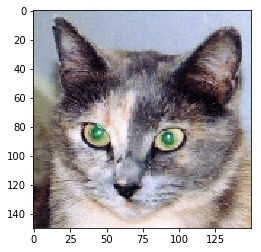

In [13]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

### 1.1.4 Instantiating a Mdoel from an input tensor and a list of output tensors

In [17]:
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

### 1.1.5 Running our model in predict mode

In [18]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

### 1.1.6 First entry in the outputs: the output of the first layer of the original model

In [19]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


### 1.1.7 Plotting the 4th channel of the activation of the first layer of the original model

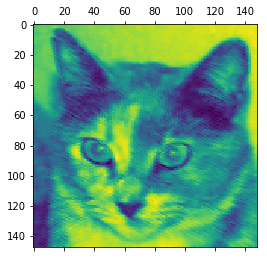

In [20]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()